# Ενδιάμεση Εργασία

ΑΕΜ: 3108

Όνομα: Μπάρμπας Γρηγόριος 

Υλοποίηση κατηγοριοποιητή πλησιέστερου γείτονα με 1 και 3 πλησιέστερους γείτονες και τον κατηγοριοποιητή
πλησιέστερου κέντρου στην βάση δεδομένων.
Dataset: https://www.kaggle.com/oddrationale/mnist-in-csv (digits-dataset)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import heapq

import timeit

from sklearn.metrics.pairwise import euclidean_distances
from statistics import median 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
# Load Data
test_data = pd.read_csv("mnist_test.csv")
train_data = pd.read_csv("mnist_train.csv")

In [ ]:
# Get the target y of the test data
y_test = test_data.iloc[:, 0].values

In [ ]:
# Create arrays of data without the labels
X_test = test_data.iloc[:, 1:].values
X_train = train_data.iloc[:, 1:].values

In [ ]:
# K-Nearest Neighbors
def knn(test, train, neighbors):
    print('Starting K Nearest Neighbors: ')

    # Calculate the distances between each of test cases with the trained ones
    # distances is a 2d array: each row is a vector of distances between a test 
    # case with all the cases in the training data
    distances = euclidean_distances(test, train)

    # Getting the k minimum distances (k: number of neighbors)
    # hq is a 2d array: for each of the previous distances we keep the k min
    # distances with the indexed on the original array so we can use it to find
    # the labels
    hq = [heapq.nsmallest(neighbors, enumerate(row), key=lambda x: x[1]) for row in distances]

    # Keeping only the indexes of the k-nearest neighbors
    k_nearest = [[i[0] for i in row] for row in hq]

    # Find the highest frequency of labels between the neighbors
    predictions = [median(train_data.loc[k_n]['label']) for k_n in k_nearest]

    return predictions

In [ ]:
start = timeit.default_timer()

predictionsKNN = knn(X_test, X_train, 3)

stop = timeit.default_timer()

print('Time: ', stop - start, 'seconds')

In [ ]:
print('F1 score (macro):', f1_score(y_test, predictionsKNN, average='macro'))
print('F1 score (micro):', f1_score(y_test, predictionsKNN, average='micro'))
print('F1 score (weighted):', f1_score(y_test, predictionsKNN, average='weighted'))

print('Accuracy Score: ', accuracy_score(y_test, predictionsKNN))

print('Mean Squared Error: ', mean_squared_error(y_test, predictionsKNN))

In [ ]:
def ncc(test, train):
    print('Starting Nearest Center of Data: ')
    
    # Create dataframes for each class (0,1,2,3,4,5,6,7,8,9)
    train0 = train.loc[train['label'] == 0].drop('label', 1)
    train1 = train.loc[train['label'] == 1].drop('label', 1)
    train2 = train.loc[train['label'] == 2].drop('label', 1)
    train3 = train.loc[train['label'] == 3].drop('label', 1)
    train4 = train.loc[train['label'] == 4].drop('label', 1)
    train5 = train.loc[train['label'] == 5].drop('label', 1)
    train6 = train.loc[train['label'] == 6].drop('label', 1)
    train7 = train.loc[train['label'] == 7].drop('label', 1)
    train8 = train.loc[train['label'] == 8].drop('label', 1)
    train9 = train.loc[train['label'] == 9].drop('label', 1)

    # Calculate the centers of each class
    center0 = np.mean(train0, axis=0)
    center1 = np.mean(train1, axis=0)
    center2 = np.mean(train2, axis=0)
    center3 = np.mean(train3, axis=0)
    center4 = np.mean(train4, axis=0)
    center5 = np.mean(train5, axis=0)
    center6 = np.mean(train6, axis=0)
    center7 = np.mean(train7, axis=0)
    center8 = np.mean(train8, axis=0)
    center9 = np.mean(train9, axis=0)

    # Join the centers
    centers = [center0,center1,center2,center3,
               center4,center5,center6,center7,
               center8,center9]

    # Calculate the distances between each of test cases with the trained ones
    # distances is a 2d array: each row is a vector of distances between a test 
    # case with all the centers
    distances = euclidean_distances(test, centers)

    # Find the minimum distance from the previoys distances
    min_dist = [(heapq.nsmallest((1), range(len(i)), i.take)) for i in distances]

    # Save predictions in an array
    predictions = [i for i in min_dist]
    predictions = np.array(predictions)

    return predictions
    

In [ ]:
start = timeit.default_timer()

predictionsNCC = ncc(X_test, train_data)

stop = timeit.default_timer()

print('Time: ', stop - start, 'seconds')

In [ ]:
print('F1 score (macro):', f1_score(y_test, predictionsNCC, average='macro'))
print('F1 score (micro):', f1_score(y_test, predictionsNCC, average='micro'))
print('F1 score (weighted):', f1_score(y_test, predictionsNCC, average='weighted'))

print('Accuracy Score: ', accuracy_score(y_test, predictionsNCC))

print('Mean Squared Error: ', mean_squared_error(y_test, predictionsNCC))

## K-Nearest Neighbors

#### Neighbors=3
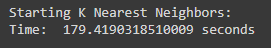
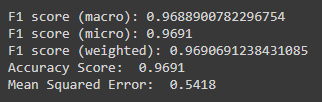

#### Neighbors=1
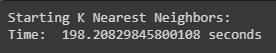
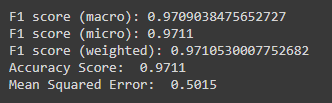

## Nearest Center of Data
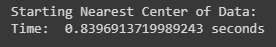
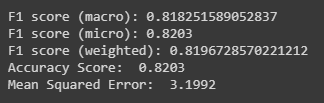